In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Enable Jupyter to display graphs
%matplotlib inline

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [2]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

It looks like most of these columns are objects or strings. They should all be floats if they're gonna be exchange rates.  
The Greek drachma only has 520 entries. There are more with less than 5000 entries as well.

In [4]:
# Rename the columns we're gonna use.
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                               inplace=True)
# Convert the date column to a useable datetime object, sort ascending and reset the index to match.
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

# IMPORTANT make a copy of the new dataframe.
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

# There were a bunch of dashes (-) in the dollar column plus they're strings (object). Drop 'n' convert!
euro_to_dollar.drop(euro_to_dollar[euro_to_dollar['US_dollar'] == '-'].index, inplace=True)
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
5694,2021-01-04,1.2296
5695,2021-01-05,1.2271
5696,2021-01-06,1.2338
5697,2021-01-07,1.2276


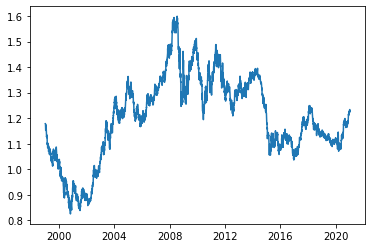

In [5]:
plt.plot(euro_to_dollar['Time'], 
         euro_to_dollar['US_dollar'])
plt.show()

In [6]:
values = pd.DataFrame()
values['daily_values'] = pd.Series(range(1,20,2))

values['rolling_mean_2'] = values['daily_values'].rolling(2).mean()

values['rolling_mean_3'] = values['daily_values'].rolling(3).mean()
values['rolling_mean_5'] = values['daily_values'].rolling(5).mean()

In [24]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


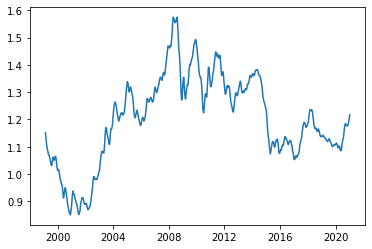

In [8]:
plt.plot(euro_to_dollar['Time'], 
         euro_to_dollar['rolling_mean'])
plt.show()

Let's take a look at how the exchange rate fluctuated during the previous three presidential administrations.   
* George W. Bush (2001-2009)  
* Barack Obama (2009-2017)  
* Donald Trump (2017-2021)  

We'll find ways to highlight these three periods.

In [390]:
euro_to_dollar['year'] = pd.DatetimeIndex(euro_to_dollar['Time']).year
# euro_to_dollar
bush = euro_to_dollar[euro_to_dollar['year'].between(2001, 2009, inclusive='left')]
obama = euro_to_dollar[euro_to_dollar['year'].between(2009, 2017, inclusive='left')]
trump = euro_to_dollar[euro_to_dollar['year'].between(2017, 2021, inclusive='left')]
# obama
trump

,Time,US_dollar,rolling_mean,year
4672,2017-01-02,1.0465,1.055517,2017
4673,2017-01-03,1.0385,1.054697,2017
4674,2017-01-04,1.0437,1.054097,2017
4675,2017-01-05,1.0501,1.053760,2017
4676,2017-01-06,1.0589,1.053897,2017
...,...,...,...,...
5689,2020-12-24,1.2193,1.204173,2020
5690,2020-12-28,1.2219,1.205520,2020
5691,2020-12-29,1.2259,1.206950,2020
5692,2020-12-30,1.2281,1.208280,2020


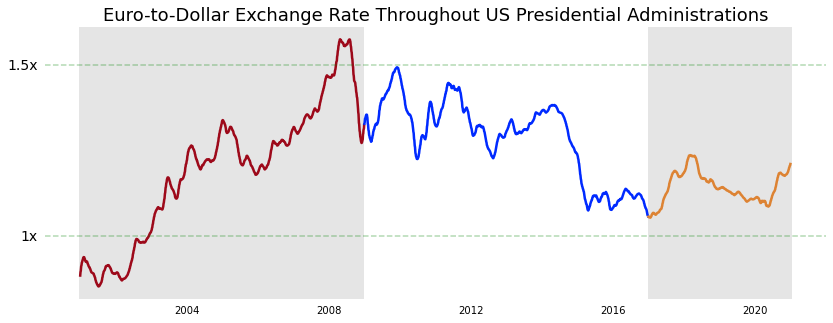

In [391]:
fig, ax = plt.subplots(figsize=(14,5))
ax.set_title('Euro-to-Dollar Exchange Rate Throughout US Presidential Administrations', fontsize=18)

plt.plot(bush['Time'], bush['rolling_mean'], color='#af0b1e', linewidth=2.5)
plt.plot(obama['Time'], obama['rolling_mean'], color='#002AFF', linewidth=2.5)
plt.plot(trump['Time'], trump['rolling_mean'], color='#F79239', linewidth=2.5)

plt.axvline(12775, c='black', alpha=0.1, linewidth=285,
           ymin=0.1, ymax=0.9)
plt.axvline(17900, c='black', alpha=0.1, linewidth=144,
           ymin=0.1, ymax=0.9)
plt.axhline(y=1.0, color='g', linestyle='--', alpha=0.3)
plt.axhline(y=1.5, color='g', linestyle='--', alpha=0.3)

plt.yticks([1.0, 1.5], ['1x', '1.5x'], fontsize=14)

plt.tick_params(bottom=0, left=0)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

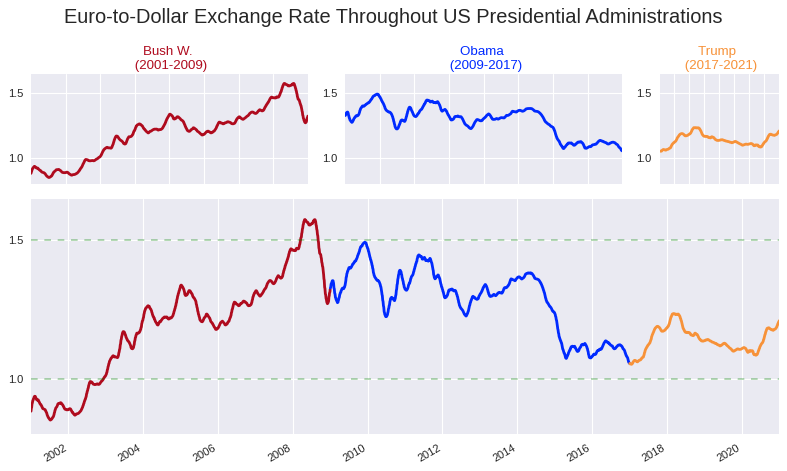

In [490]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,6))

plt.suptitle('Euro-to-Dollar Exchange Rate Throughout US Presidential Administrations', fontsize=18)
gs = GridSpec(nrows=3, ncols=5)

# First axes
ax1 = fig.add_subplot(gs[0, :2])
ax1.set_title('Bush W. \n (2001-2009)', color='#af0b1e')
ax1.plot(bush['Time'], bush['rolling_mean'], color='#af0b1e', linewidth=2.5)

# Second axes
ax2 = fig.add_subplot(gs[0, 2:4])
ax2.set_title('Obama \n (2009-2017)', color='#002AFF')
ax2.plot(obama['Time'], obama['rolling_mean'], color='#002AFF', linewidth=2.5)

# Third axes
ax3 = fig.add_subplot(gs[0, 4])
ax3.set_title('Trump \n (2017-2021)', color='#F79239')
ax3.plot(trump['Time'], trump['rolling_mean'], color='#F79239', linewidth=2.5)


# Fourth axes
ax4 = fig.add_subplot(gs[1:, :])
ax4.plot(bush['Time'], bush['rolling_mean'], color='#af0b1e', linewidth=2.5)
ax4.plot(obama['Time'], obama['rolling_mean'], color='#002AFF', linewidth=2.5)
ax4.plot(trump['Time'], trump['rolling_mean'], color='#F79239', linewidth=2.5)
ax4.axhline(y=1.0, color='g', linestyle='--', alpha=0.3)
ax4.axhline(y=1.5, color='g', linestyle='--', alpha=0.3)
ax4.tick_params(bottom=0, left=0)

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.tick_params(bottom=0, left=0, right=0, top=0)
    ax.set_ylim([0.8, 1.65])
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
    ax.set_yticks([1.0, 1.5])

for ax in axes[:3]:
    ax.grid(visible=True, axis='both')

fig.autofmt_xdate()
fig.tight_layout()
plt.style.use('seaborn-bright')
plt.show()